### Dados tabela Tempo

<p>Limpeza simples de dados</p>

##### Padrão:
<ul>
    <li>Aparencia: sol, nublado, chuva</li>
    <li>Temperatura: -130 ~ 130 °F</li>
    <li>Umidade: 0 ~ 100</li>
    <li>Jogar: sim, nao</li>
</ul>

In [1]:
import pandas as pd # Biblioteca para Tratamento de Dados
import seaborn as sn # Biblioteca para Visualização de Dados
import statistics as sts # Biblioteca de Estatistica

In [2]:
data = pd.read_csv("tempo.csv", sep=";")

In [3]:
data.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


### Exploração dos dados

##### Variáveis Categóricas

In [4]:
grupo_aparencia = data.groupby("Aparencia").size()
grupo_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

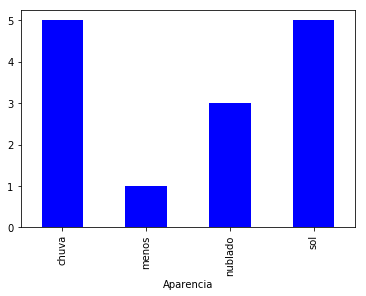

In [5]:
grupo_aparencia.plot.bar(color = "blue")

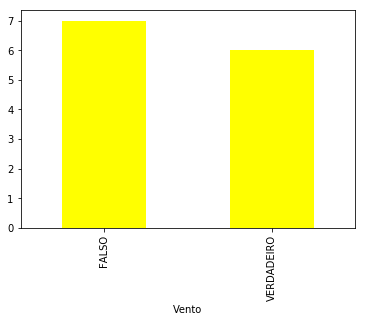

In [6]:
grupo_vento = data.groupby("Vento").size()
grupo_vento.plot.bar(color = "yellow")

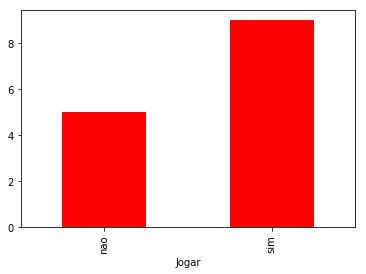

In [7]:
grupo_jogar = data.groupby("Jogar").size()
grupo_jogar.plot.bar(color = "red")

##### Variáveis Numéricas

In [8]:
data["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

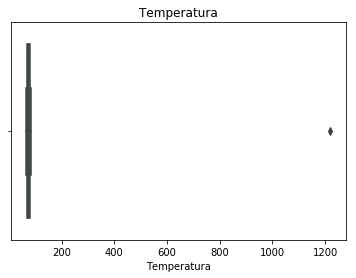

In [9]:
sn.boxplot(data["Temperatura"]).set_title("Temperatura")

Text(0.5, 1.0, 'Temperatura')

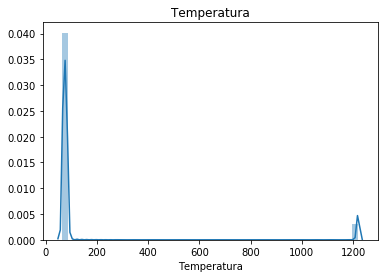

In [10]:
sn.distplot(data["Temperatura"]).set_title("Temperatura")

In [11]:
data["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

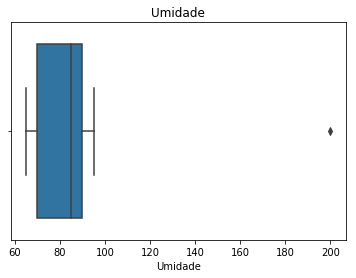

In [12]:
sn.boxplot(data["Umidade"]).set_title("Umidade")

##### Verificar valores faltantes

In [13]:
data.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

#### Conclusão
<p>Aparencia possui valor incoerente com o proposto. Temperatura possui um valor máximo alto de mais, precisa ser corrigido. Umidade possui valor alto de mais, precisa ser corrigido. Existe valores faltantes nas colunas Umidade e Vento </p>

### Tratamento de Dados

##### Aparencia
Variável categórica. Modificar valor incoerente por valor mais frequente(Moda)

In [14]:
data.loc[data["Aparencia"] == "menos", "Aparencia"] = "sol"

##### Temperatura
Variável numérica. Subistituir valores maior que 2 * desvio padrão pela mediana do conjunto.

In [15]:
mediana_temperatura = sts.median(data["Temperatura"])
desvio_temperatura = sts.stdev(data["Temperatura"])
data.loc[data["Temperatura"] > 2*desvio_temperatura, "Temperatura"] = mediana_temperatura

##### Umidade
Variável numérica. Subistituir valores maior que 2 desvio padrão por mediana do conjunto.

In [16]:
mediana_umidade = sts.median(data["Umidade"])
desvio_umidade = sts.stdev(data["Umidade"])
data.loc[data["Umidade"] > 2*desvio_umidade, "Umidade"] = mediana_umidade

##### Valores Faltantes
Fazer as respectivas substituições de acordo com o tipo de variável

In [17]:
data["Umidade"].fillna(mediana_umidade, inplace=True)
data["Vento"].fillna("FALSO", inplace=True)
data.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

#### Por que usar mediana e não média?
Porque mediana esta no centro do conjunto de dados independente dos valores maximos e minimos, ela sempre será uma medida de centro. A média varia de acordo com os valores presente no conjunto, se houver valores muito altos como outliers, a média será afetada.